In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
anime_data = pd.read_csv("anime.csv")

In [4]:
# --- Data Cleaning ---

# Convert 'episodes' to numeric, setting errors='coerce' to handle non-numeric values
anime_data['episodes'] = pd.to_numeric(anime_data['episodes'], errors = 'coerce')

# Handling missing values
anime_data['genre'].fillna('Unknown', inplace=True)
anime_data['type'].fillna('Unknown', inplace=True)
anime_data['rating'].fillna(anime_data['rating'].mean(), inplace = True)
anime_data['episodes'].fillna(0, inplace=True)  # Assuming 0 for missing episodes

In [5]:
# --- Descriptive Statistics ---

# Basic summary statistics
summary_stats = anime_data.describe()

# Count of anime types
type_counts = anime_data['type'].value_counts()

In [6]:
# --- Data Exploration ---

# Distribution of ratings
rating_distribution = anime_data['rating'].describe()

# Distribution of members
members_distribution = anime_data['members'].describe()

# Count of anime per genre (considering the first genre listed if multiple)
anime_data['primary_genre'] = anime_data['genre'].apply(lambda x: x.split(',')[0])
genre_counts = anime_data['primary_genre'].value_counts()

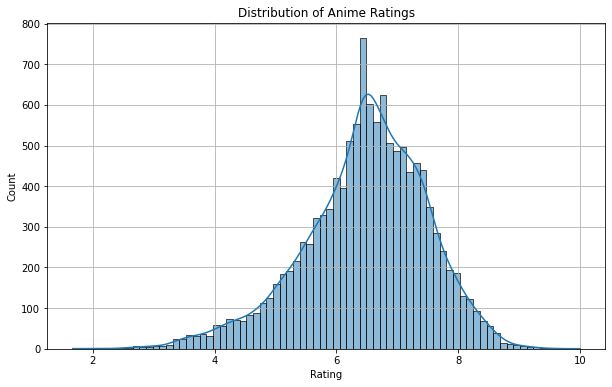

In [9]:
# Rating distribution plot
plt.figure(figsize = (10, 6))
sns.histplot(anime_data['rating'], kde = True)
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('anime_ratings_distribution.png')

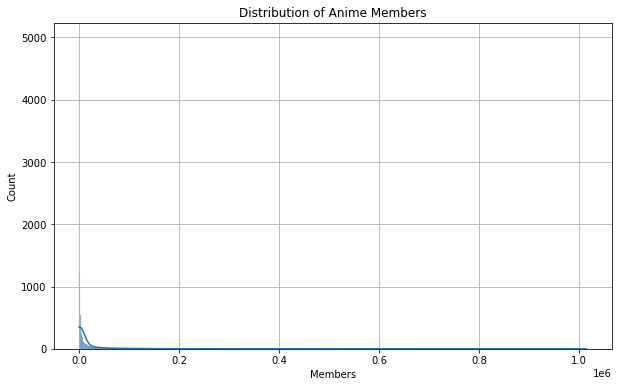

In [10]:
# Members distribution plot
plt.figure(figsize = (10, 6))
sns.histplot(anime_data['members'], kde = True)
plt.title('Distribution of Anime Members')
plt.xlabel('Members')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('anime_members_distribution.png')

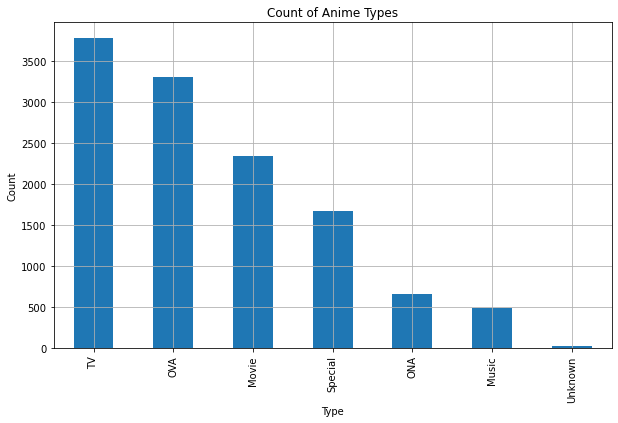

In [11]:
plt.figure(figsize = (10, 6))
type_counts.plot(kind = 'bar')
plt.title('Count of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('anime_type_count.png')

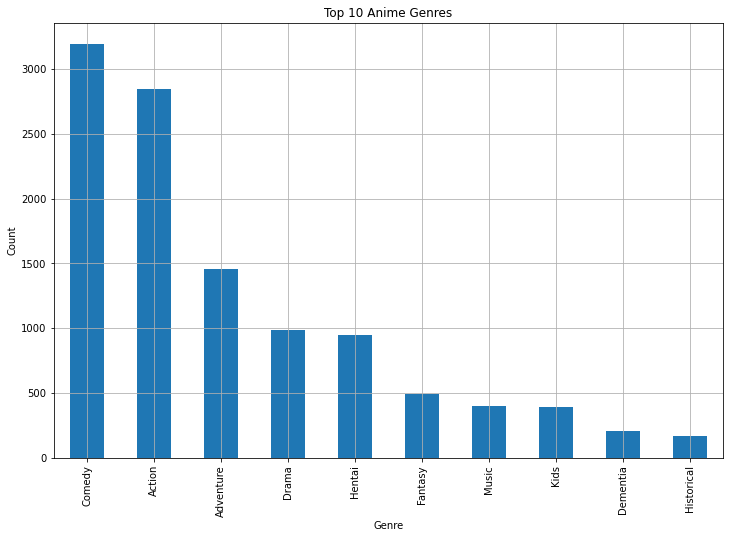

In [13]:
# Genre count plot
plt.figure(figsize = (12, 8))
genre_counts.head(10).plot(kind = 'bar') 
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid(True)
plt.savefig('anime_genre_count.png')

In [14]:
visualization_paths = {
    'rating_distribution': 'anime_ratings_distribution.png',
    'members_distribution': 'anime_members_distribution.png',
    'type_count': 'anime_type_count.png',
    'genre_count': 'anime_genre_count.png'
}

(summary_stats, type_counts.head(), rating_distribution, members_distribution, genre_counts.head(), visualization_paths)

(           anime_id      episodes        rating       members
 count  12294.000000  12294.000000  12294.000000  1.229400e+04
 mean   14058.221653     12.040101      6.473902  1.807134e+04
 std    11455.294701     46.257299      1.017096  5.482068e+04
 min        1.000000      0.000000      1.670000  5.000000e+00
 25%     3484.250000      1.000000      5.900000  2.250000e+02
 50%    10260.500000      2.000000      6.550000  1.550000e+03
 75%    24794.500000     12.000000      7.170000  9.437000e+03
 max    34527.000000   1818.000000     10.000000  1.013917e+06,
 TV         3787
 OVA        3311
 Movie      2348
 Special    1676
 ONA         659
 Name: type, dtype: int64,
 count    12294.000000
 mean         6.473902
 std          1.017096
 min          1.670000
 25%          5.900000
 50%          6.550000
 75%          7.170000
 max         10.000000
 Name: rating, dtype: float64,
 count    1.229400e+04
 mean     1.807134e+04
 std      5.482068e+04
 min      5.000000e+00
 25%      2.2